<a href="https://colab.research.google.com/github/mknomics/soda/blob/main/Soda_Time_Variations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and preliminaries

In [25]:
import pandas as pd  #pandas is good for data manipulation.  I rename it here as "pd" to make it easier to call in the script below.  I could rename it anything I want but "pd" is standard
import matplotlib.pyplot as plt #matplotlib is a good package for graphing.  Again, I rename it plt to make coding more simple
from IPython.display import HTML

import numpy as np #numpy is a good package for doing calculations
from sklearn.linear_model import LinearRegression  #sklearn is a package that is good at estimation.  Tons of models are available and here I import LinearRegression because that's all I need

pd.set_option('display.max_rows', None) # This is just configuring how pandas displays results.  Without this line of code then pandas would only display a partial set of the output when the output is long.  I want to see it all.

#Import a csv file from a target url:  What is a csv file?  Go to the url below to see the raw data.  columns are separated by a "," and the last column lacks a ","
data_url='https://raw.githubusercontent.com/mknomics/soda/main/soda.csv' # I define a string variable using apostrophe ' but I could ahve also used quotes " ".  I just cannot mix apostophe and quotes in the same line

df = pd.read_csv(data_url) # This line creates a pandas DataFrame that I defined as "df".  I could have called it anything I want

# Set my date objects.  This must be done so that 'date' is recognized as a date and not just a random string variable
df['date']=pd.to_datetime(df['date']) #make date a datetime object
df['year']=pd.DatetimeIndex(df['date']).year # I define a variable 'year' using the DatetimeIndex method
df['month']=pd.DatetimeIndex(df['date']).month # similarly I repeat and define 'month'

## Exploring time dimensions:  
**Background:**  As you remember, we discovered that the variation in the data is likely coming from either the time dimension, the store dimension or a combination of both.  There was no variation in average prices across cities.  

**First Step in temporal analysis:**  Graph catagories across the time dimensions 

We will discover changes in market demand, market share, other seasonal trends and growth patterns easily from graphs.  


### New Method:  loc to slice the data

Call your data based on a condition using "loc" method
#### Conditions are { and = & ; or = |  ; not = != , ~= and equal = "=="} YES I TYPED TWO EQUAL SIGNS IN THE LAST CONDITION

#### Syntax for single condition is: "df[(condition 1)]" 
#### Syntax for multiple conditions are: "df[(condition 1) logical operator (condition 2)]" 

In [36]:

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YGpubt5BA9w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [34]:
df.loc[(df['brand']=='adult-cola') & (df['capacity']=='1.5lt')].head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,year,month
0,1222,2013-02-28,Athens,37.96245,23.68708,671022,shop_3,adult-cola,plastic,1.5lt,2.46,10709,2013,2
1,1256,2013-02-28,Athens,37.97945,23.71622,671022,shop_1,adult-cola,plastic,1.5lt,1.91,12703,2013,2
2,2325,2014-02-28,Athens,37.97945,23.71622,668203,shop_1,adult-cola,plastic,1.5lt,3.99,3642,2014,2
3,2333,2014-02-28,Athens,37.96245,23.68708,668203,shop_3,adult-cola,plastic,1.5lt,2.82,9282,2014,2
4,3334,2015-02-28,Athens,37.97945,23.71622,667237,shop_1,adult-cola,plastic,1.5lt,1.29,15782,2015,2


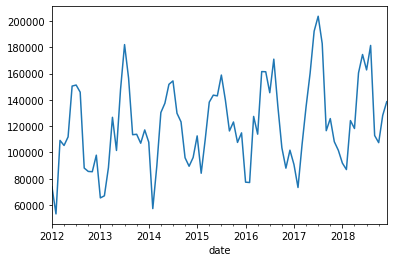

In [11]:
# Goal: extract 'adult-cola' that is 1.5 liter and define a new data frame

#Step 1: create a new column of data that is "True" if the conditions are met and "False" otherwise
(df['brand']=='adult-cola') & (df['capacity']=='1.5lt') 

# Step 2: put this column of "True" and "False" into the loc method by calling df.loc[conditions]
df.loc[(df['brand']=='adult-cola') & (df['capacity']=='1.5lt')]

# Step 3 (optional): define a new dataframe from Step 2 called "ac_15", but you can call it anything 
ac_15 = df.loc[(df['brand']=='adult-cola') & (df['capacity']=='1.5lt')]

# Now let's do some stuff with this reduced set
ac_15.groupby(['date'])['quantity'].sum().plot()



In [37]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YB3wdCSA2oQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

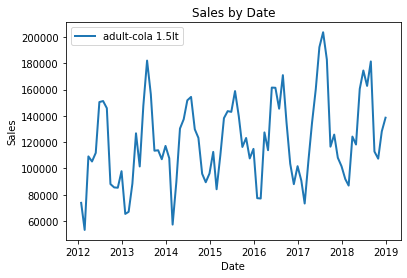

In [10]:
# plot() is ok but we have a much better package matplotlib that we loaded as "plt" in the first block of code.  Let's use it

# Step 1: define the plot
Y = ac_15.groupby(['date'])['quantity'].sum()  #Defines "Y" variable so I call it Y but you can call it anything
#NOTE: this is the same as the line below
Y = df.loc[(df['brand']=='adult-cola') & (df['capacity']=='1.5lt')].groupby(['date'])['quantity'].sum() 

plt.plot(Y, label='adult-cola 1.5lt', linewidth=2) # Now plot it


# Step 2: add other details to the graph to make it look more complete
#add title and axis labels
plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Sales')

#add legend
plt.legend()

#display plot
plt.show() 

# Adding more plots (brands) to the same graph


In [38]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/pzK-gVNNBmo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

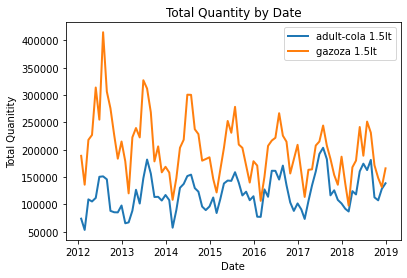

In [31]:
# Define multiple Y values 
Y1 = df.loc[(df['brand']=='adult-cola') & (df['capacity']=='1.5lt')].groupby(['date'])['quantity'].sum() 
Y2 = df.loc[(df['brand']=='gazoza') & (df['capacity']=='1.5lt')].groupby(['date'])['quantity'].sum() 

plt.plot(Y1, label='adult-cola 1.5lt', linewidth=2) # Now plot Adult-Cola
plt.plot(Y2, label='gazoza 1.5lt', linewidth=2) # Now plot Gazoza


# Step 2: add other details to the graph to make it look more complete
#add title and axis labels
plt.title('Total Quantity by Date')
plt.xlabel('Date')
plt.ylabel('Total Quanitity')

#add legend
plt.legend()

#display plot
plt.show() 

## Loops: one way to eliminate repeated code
Do you notice that Y1 is defined just like Y2 except for a single difference, the brand?  What if I asked for a graph of all brands?  You would have to type them all out!  How tedious!!!  "For Loop" to the Rescue

In [39]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/lmGpK-W35Go" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [32]:
pd.unique(df['brand'])

array(['adult-cola', 'gazoza', 'kinder-cola', 'lemon-boost',
       'orange-power'], dtype=object)

In [13]:
# Step 1: extract a list of unique values for "brand" and define it as a new variable "brands"
brands = pd.unique(df['brand'])

# NOTE: I end the next line with a colon
for i in brands: # "i" can be called anything, but where it appears in the codeblock below it will be replaced by an element from the list "brands"
  print(i)
  #NOTE: the line above is indented.  Indentation defines everything that is contained in the loop
  # The loop will run this entire indented code block line-by-line replacing any "i" with the first element in the list "brand"
  # at the end of the indended block, the code will cycle back to the first line of the block and replace "i" with the second element of the list "brand"
  # repeat process until all elements from "brand" have been used
  


adult-cola
gazoza
kinder-cola
lemon-boost
orange-power


### Now let's add our target code into the Loop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

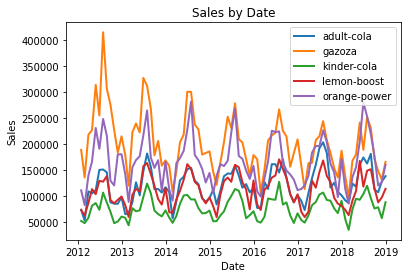

In [33]:
for i in brands:
  Y = df.loc[(df['brand']==i) & (df['capacity']=='1.5lt') ].groupby(['date'])['quantity'].sum() # Y will be redefined on each iteration of the loop
  plt.plot(Y, label=i, linewidth=2) # Add the plot for the current Y and restart the loop
# All plots have now been added

# Step 2: add other details to the graph to make it look more complete
#add title and axis labels
plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Sales')

#add legend
plt.legend()

# export the file from colab (download)
from google.colab import files
plt.savefig('Soda.png')
files.download('Soda.png')

#display plot
plt.show() 